In [7]:
library(tidyverse)
ggplot2::theme_set(theme_bw())
library(showtext)
font_add("nanum", "NanumGothic.ttf")
showtext_auto()

In [2]:
setwd("C:/Soongsil/R/Textmining")

In [3]:
raw_moon <- readLines("speech_moon.txt", encoding = "UTF-8")
head(raw_moon)

[1] "정권교체 하겠습니다!"                                                                                                                                                              
[2] "  정치교체 하겠습니다!"                                                                                                                                                            
[3] "  시대교체 하겠습니다!"                                                                                                                                                            
[4] "  "                                                                                                                                                                                
[5] "  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다."
[6] ""

## 01-01 데이터 전처리
## stringr

### ```str_replace_all()``` : 불필요한 문자 제거
- ```string``` ; 처리할 텍스트
- ```pattern``` : 규칙
- ```replacement``` : 바꿀 문자

In [4]:
txt <- "치킨은!! 맛있다. xyx 정말 맛있다!@$"
txt

[1] "치킨은!! 맛있다. xyx 정말 맛있다!@$"

In [5]:
(txt1 <- str_replace_all(string = txt, pattern = "[^가-힣]", replacement = " "))

[1] "치킨은   맛있다      정말 맛있다   "

In [6]:
moon <- raw_moon %>%
    str_replace_all(pattern = "[^가-힣]", replacement = " ")

head(moon)

[1] "정권교체 하겠습니다 "                                                                                                                                                        
[2] "  정치교체 하겠습니다 "                                                                                                                                                      
[3] "  시대교체 하겠습니다 "                                                                                                                                                      
[4] "  "                                                                                                                                                                          
[5] "   불비불명       이라는 고사가 있습니다  남쪽 언덕 나뭇가지에 앉아   년 동안 날지도 울지도 않는 새  그러나 그 새는 한번 날면 하늘 끝까지 날고  한번 울면 천지를 뒤흔듭니다 "
[6] ""

### ```str_squish()``` : 연속된 공백 제거, 공백을 하나만 남김

In [8]:
(txt2 <- str_squish(txt1))

[1] "치킨은 맛있다 정말 맛있다"

In [9]:
moon <- moon %>%
    str_squish()

head(moon)

[1] "정권교체 하겠습니다"                                                                                                                                          
[2] "정치교체 하겠습니다"                                                                                                                                          
[3] "시대교체 하겠습니다"                                                                                                                                          
[4] ""                                                                                                                                                             
[5] "불비불명 이라는 고사가 있습니다 남쪽 언덕 나뭇가지에 앉아 년 동안 날지도 울지도 않는 새 그러나 그 새는 한번 날면 하늘 끝까지 날고 한번 울면 천지를 뒤흔듭니다"
[6] ""

In [10]:
moon <- as_tibble(moon)

In [11]:
moon <- raw_moon %>%
    str_replace_all("[^가-힣]", " ") %>%
    str_squish() %>%
    as_tibble() 

## 01-02 토큰화하기

In [12]:
library(tidytext)

In [13]:
text <- tibble(value = "대한민국은 민주공화국이다. 대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.")
text

value
<chr>
"대한민국은 민주공화국이다. 대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다."


### ```unnest_tokens()``` : 텍스트 토큰화
- ```input``` : 토큰화할 텍스트
- ```output``` : 토큰을 담을 변수명
- ```token``` : 텍스트를 나누는 기준, (```"sentences"``` : 문장 기준, ```"words"``` : 띄어쓰기 기준, ```"characters"``` : 글자 기준)

In [14]:
text %>% unnest_tokens(input = value,
                      output = word,
                      token = "sentences")

text %>% unnest_tokens(input = value,
                      output = word,
                      token = "words")

text %>% unnest_tokens(input = value,
                      output = word,
                      token = "characters") %>% head

word
<chr>
대한민국은 민주공화국이다.
"대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다."


word
<chr>
대한민국은
민주공화국이다
대한민국의
주권은
국민에게
있고
모든
권력은
국민으로부터


word
<chr>
대
한
민
국
은
민


In [15]:
word_space <- moon %>% unnest_tokens(input = value,
                                    output = words,
                                    token = "words")
word_space %>% print

# A tibble: 2,025 x 1
   words     
   <chr>     
 1 정권교체  
 2 하겠습니다
 3 정치교체  
 4 하겠습니다
 5 시대교체  
 6 하겠습니다
 7 불비불명  
 8 이라는    
 9 고사가    
10 있습니다  
# ... with 2,015 more rows


## 01-03 단어 빈도 분석

### ```count()``` : 단어 빈도 구하기
- ```sort = TRUE``` : 빈도가 높은 순으로 단어 정렬

In [16]:
word_space <- word_space %>%
    count(words, sort = T)

word_space %>% print

# A tibble: 1,440 x 2
   words            n
   <chr>        <int>
 1 합니다          27
 2 수              16
 3 있습니다        13
 4 저는            13
 5 등              12
 6 있는            12
 7 함께            12
 8 만들겠습니다    11
 9 일자리          10
10 국민의           9
# ... with 1,430 more rows


### 한 글자로 된 단어 제거

In [17]:
word_space <- word_space %>%
    filter(str_count(words) > 1)

word_space %>% print

# A tibble: 1,384 x 2
   words            n
   <chr>        <int>
 1 합니다          27
 2 있습니다        13
 3 저는            13
 4 있는            12
 5 함께            12
 6 만들겠습니다    11
 7 일자리          10
 8 국민의           9
 9 우리             9
10 우리나라         9
# ... with 1,374 more rows


### 자주 사용된 단어 추출

In [18]:
top20 <- word_space %>%
    head(20)

top20 %>% print

# A tibble: 20 x 2
   words            n
   <chr>        <int>
 1 합니다          27
 2 있습니다        13
 3 저는            13
 4 있는            12
 5 함께            12
 6 만들겠습니다    11
 7 일자리          10
 8 국민의           9
 9 우리             9
10 우리나라         9
11 새로운           8
12 위해             8
13 그리고           7
14 나라             7
15 나라가           7
16 지금             7
17 낡은             6
18 대통령이         6
19 되겠습니다       6
20 없는             6


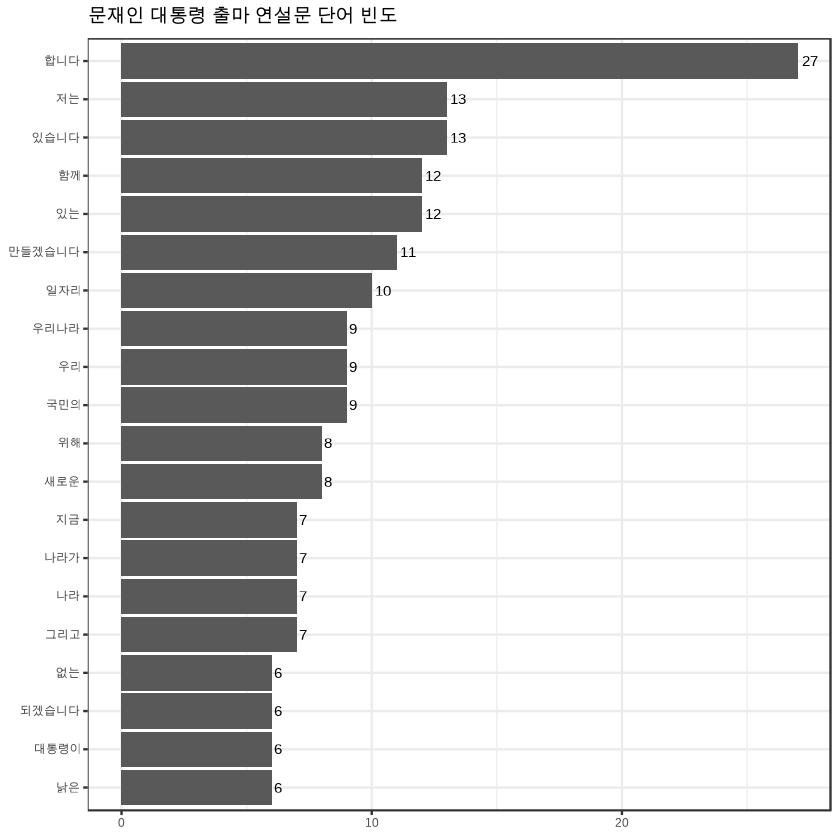

In [19]:
ggplot(top20) + geom_col(aes(fct_reorder(words, n), n)) + 
    coord_flip() + 
    geom_text(aes(x = words, y = n, label = n), hjust = -0.3) + 
    labs(title = "문재인 대통령 출마 연설문 단어 빈도", 
        x = NULL, y = NULL) + 
    theme(title = element_text(size = 12))

### ```geom_text_wordcloud()``` : 워드 클라우드
- ```seed```
- ```family``` : 글씨 폰트

###  ```scale_radius()``` : 그래프에 표현할 값의 범위를 설정 -
- ```limits``` : 최소, 최대 단어 빈도,
-```range``` : 최소, 최대 글자 크기)

###  ```scale_color_gradient()``` : 단어의 색깔을 빈도에 따라 그라데이션으로 표현 
- ```low``` : 빈도가 최소일 때
- ```high``` : 빈도가 최대일 때 색깔을 입력)


In [19]:
library(ggwordcloud)

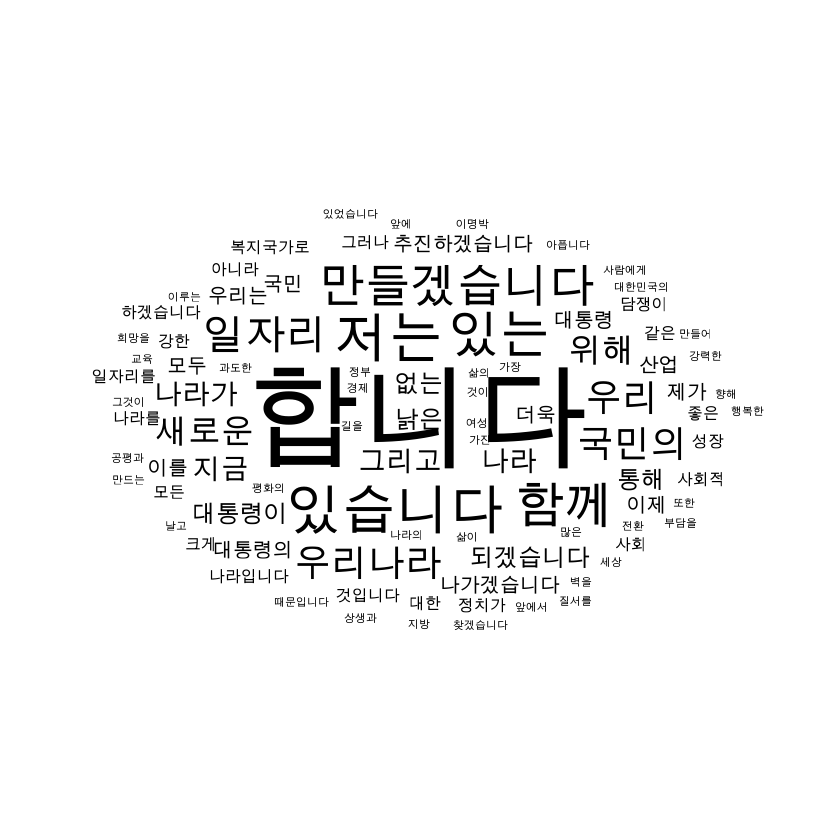

In [20]:
ggplot(word_space, aes(label = words, size = n)) +
    geom_text_wordcloud(seed = 1234) +     
    scale_radius(limits = c(3, NA),
                  range = c(3, 30)) + 
    scale_color_gradient(low = "#66aaf2",
                        high = "#004EA1") + 
    theme_minimal()

### ```font_all_google()``` : 구글 폰트 불러오기

In [21]:
font_add_google(name = "Nanum Gothic", family = "nanumgothic")
showtext_auto()

In [ ]:
ggplot(word_space, aes(label = words, size = n, col = n)) +
  geom_text_wordcloud(seed = 1234,
                      family = "nanumgothic") + 
  scale_radius(limits = c(3, NA),
               range = c(3, 30)) +
  scale_color_gradient(low = "#66aaf2",
                       high = "#004EA1") +
  theme_minimal()

<img src = "https://github.com/youngwoos/Doit_textmining/blob/main/docs/Image/01/01_3_4.png?raw=true">

In [23]:
font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

In [ ]:
ggplot(word_space, aes(label = words, size = n, col = n)) +
  geom_text_wordcloud(seed = 1234,
                      family = "blackhansans") +  
  scale_radius(limits = c(3, NA),
               range = c(3, 30)) +
  scale_color_gradient(low = "#66aaf2",
                       high = "#004EA1") +
  theme_minimal()

<img src = "https://github.com/youngwoos/Doit_textmining/blob/main/docs/Image/01/01_3_6.png?raw=true">

In [25]:
font_add_google(name = "Gamja Flower", family = "gamjaflower")
showtext_auto()

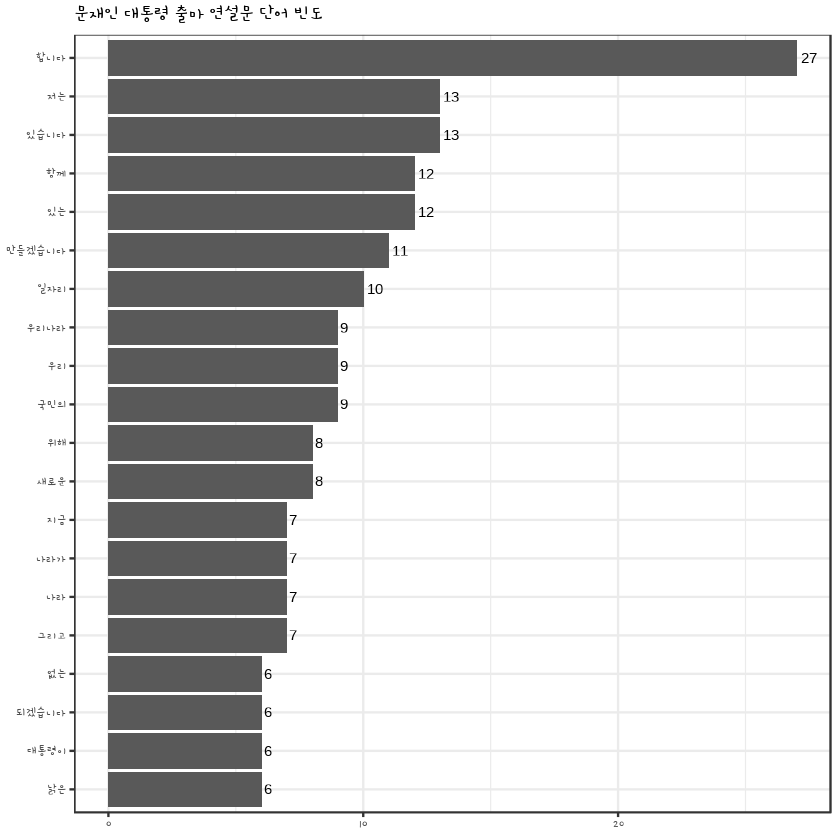

In [26]:
ggplot(top20) + geom_col(aes(fct_reorder(words, n), n)) + 
    coord_flip() + 
    geom_text(aes(x = words, y = n, label = n), hjust = -0.3) + 
    labs(title = "문재인 대통령 출마 연설문 단어 빈도", 
        x = NULL, y = NULL) + 
    theme(title = element_text(size = 12),
             text = element_text(family = "gamjaflower"))

### Q1

In [29]:
raw_park <- readLines("speech_park.txt", encoding = "UTF-8")
raw_park %>% head

[1] "존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대한민국을 만들기 위해, 저의 모든 것을 바치겠다는 각오로 이 자리에 섰습니다. 저 박근혜, 이번 18대 대통령선거 출마를 선언합니다."                                                                                                                                                  
[2] ""                                                                                                                                                                                                                                                                                                                                                            
[3] "국민 여러분! 저의 삶은 대한민국과 함께 해온 시간이었습니다. 우리나라가 가난을 이기고, 꿈을 이뤄가는 위대한 과정을 어린 시절부터 가슴깊이 새겨왔습니다."                                                                                                                                                                                                      
[4] ""                                                                                                                                                                                                                                                                                                                                                            
[5] "어머니가 흉탄에 돌아가신 후, 견딜 수 없는 고통과 어려움 속에서도 그 힘든 시간을 이겨낼 수 있었던 것은, 어머니의 빈자리에 대한 책임감과 사명감 때문이었습니다. 그리고 늘 함께 해주시고 힘이 되어 주셨던 국민 여러분이 계셨기 때문이었습니다. 제가 그 막중한 일을 해내고, 고통을 이겨내고 다시 일어설 수 있었던 것은 모두 국민 여러분이 계셨기 때문이었습니다."
[6] ""

In [30]:
park <- raw_park %>%
    str_replace_all("[^가-힣]", " ") %>%
    str_squish() %>%
    as_tibble() 

In [36]:
word_space2 <- park %>%
    unnest_tokens(input = value,
                 output = word,
                 token = "words")

word_space %>% print

# A tibble: 1,384 x 2
   words            n
   <chr>        <int>
 1 합니다          27
 2 있습니다        13
 3 저는            13
 4 있는            12
 5 함께            12
 6 만들겠습니다    11
 7 일자리          10
 8 국민의           9
 9 우리             9
10 우리나라         9
# ... with 1,374 more rows


### Q2

In [33]:
word_space2 <- word_space2 %>%
    count(word, sort = T) %>%
    filter(str_count(word) > 1)

top20 <- word_space2 %>%
    head(20)

In [35]:
top20

word,n
<chr>,<int>
국민,29
저는,14
있습니다,12
함께,12
꿈을,10
것입니다,8
새로운,8
있는,8
국민행복의,7


### Q3

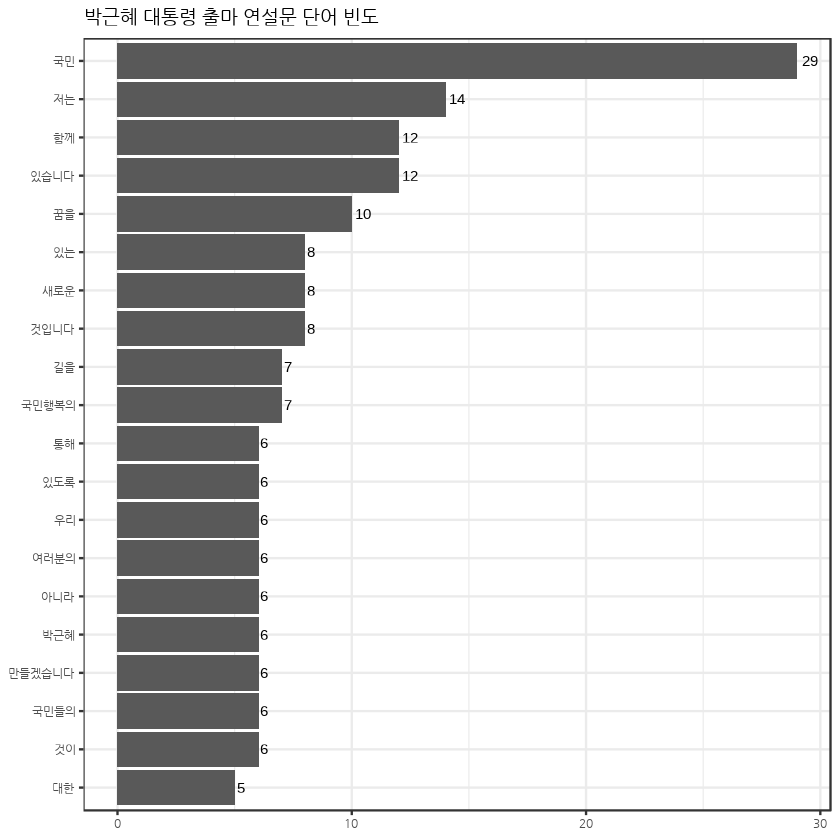

In [38]:
ggplot(top20) + geom_col(aes(fct_reorder(word, n), n)) + 
    coord_flip() + 
    geom_text(aes(x = word, y = n, label = n), hjust = -0.3) + 
    labs(title = "박근혜 대통령 출마 연설문 단어 빈도", 
        x = NULL, y = NULL) + 
    theme(title = element_text(size = 12),
             text = element_text(family = "nanumgothic"))